In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2024-08-08T14:06:01.585Z', 'error_code': 0, 'error_message': None, 'elapsed': 20, 'credit_count': 1, 'notice': None, 'total_count': 10047}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11630, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
type(data)

dict

In [7]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973719e+07,1.973719e+07,False,NaN,1,NaN,NaN,None,2024-08-08T14:03:00.000Z,57469.565268,4.094101e+10,-4.1702,-0.685329,0.887333,-11.219515,0.103190,-17.251152,-8.622811,1.134288e+12,56.3606,1.206861e+12,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
1,1027,Ethereum,ETH,ethereum,9198,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202612e+08,1.202612e+08,True,NaN,2,NaN,NaN,None,2024-08-08T14:03:00.000Z,2441.550978,2.271404e+10,-2.9869,-1.536701,-0.423692,-23.335779,-20.486565,-33.822573,-19.084443,2.936239e+11,14.5896,2.936239e+11,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
2,825,Tether USDt,USDT,tether,93802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.150179e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.000495,7.029045e+10,-1.5745,0.018645,-0.031272,0.091783,0.026099,0.056914,-0.024236,1.150748e+11,5.7217,1.171260e+11,None,2024-08-08T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 10:06:08.648119
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663434e+08,5.818005e+08,True,NaN,4,NaN,NaN,None,2024-08-08T14:03:00.000Z,154.464509,5.353741e+09,-1.5270,-0.746662,1.408729,-8.992696,9.718403,-3.769075,0.975551,7.203350e+10,3.5737,8.986753e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,5,NaN,NaN,None,2024-08-08T14:03:00.000Z,487.548696,1.752628e+09,-7.4942,-0.842899,0.003613,-14.916215,-5.570072,-28.357189,-18.171351,7.115127e+10,3.5354,7.115127e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
5,3408,USDC,USDC,usd-coin,21422,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.453151e+10,3.453151e+10,False,NaN,6,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.000075,8.610407e+09,-3.5354,0.009913,-0.021098,-0.000834,0.000514,0.007015,-0.075557,3.453409e+10,1.7171,3.453409e+10,None,2024-08-08T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 10:06:08.648119
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-08T14:04:00.000Z,0.604780,5.629515e+09,301.2923,-1.193638,18.916931,-0.431505,39.646144,22.035415,17.820800,3.386723e+10,1.6839,6.047797e+10,None,2024-08-08T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
7,11419,Toncoin,TON,toncoin,498,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518305e+09,5.110179e+09,True,NaN,8,3.414167e+09,2.138114e+10,None,2024-08-08T14:03:00.000Z,6.262477,1.003525e+09,229.6051,0.175884,10.302954,-8.277358,-13.694124,-12.270017,-10.758862,1.577083e+10,0.7824,3.200238e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [23]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
  
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [25]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [68]:
df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
df72

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973719e+07,1.973719e+07,False,NaN,1,NaN,NaN,None,2024-08-08T14:03:00.000Z,57469.565268,4.094101e+10,-4.1702,-0.685329,0.887333,-11.219515,0.103190,-17.251152,-8.622811,1.134288e+12,56.3606,1.206861e+12,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
1,1027,Ethereum,ETH,ethereum,9198,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202612e+08,1.202612e+08,True,NaN,2,NaN,NaN,None,2024-08-08T14:03:00.000Z,2441.550978,2.271404e+10,-2.9869,-1.536701,-0.423692,-23.335779,-20.486565,-33.822573,-19.084443,2.936239e+11,14.5896,2.936239e+11,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
2,825,Tether USDt,USDT,tether,93802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.150179e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.000495,7.029045e+10,-1.5745,0.018645,-0.031272,0.091783,0.026099,0.056914,-0.024236,1.150748e+11,5.7217,1.171260e+11,None,2024-08-08T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 10:06:08.648119
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663434e+08,5.818005e+08,True,NaN,4,NaN,NaN,None,2024-08-08T14:03:00.000Z,154.464509,5.353741e+09,-1.5270,-0.746662,1.408729,-8.992696,9.718403,-3.769075,0.975551,7.203350e+10,3.5737,8.986753e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,5,NaN,NaN,None,2024-08-08T14:03:00.000Z,487.548696,1.752628e+09,-7.4942,-0.842899,0.003613,-14.916215,-5.570072,-28.357189,-18.171351,7.115127e+10,3.5354,7.115127e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
5,3408,USDC,USDC,usd-coin,21422,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.453151e+10,3.453151e+10,False,NaN,6,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.000075,8.610407e+09,-3.5354,0.009913,-0.021098,-0.000834,0.000514,0.007015,-0.075557,3.453409e+10,1.7171,3.453409e+10,None,2024-08-08T14:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 10:06:08.648119
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.599928e+10,9.998739e+10,False,NaN,7,NaN,NaN,None,2024-08-08T14:04:00.000Z,0.604780,5.629515e+09,301.2923,-1.193638,18.916931,-0.431505,39.646144,22.035415,17.820800,3.386723e+10,1.6839,6.047797e+10,None,2024-08-08T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
7,11419,Toncoin,TON,toncoin,498,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518305e+09,5.110179e+09,True,NaN,8,3.414167e+09,2.138114e+10,None,2024-08-08T14:03:00.000Z,6.262477,1.003525e+09,229.6051,0.175884,10.302954,-8.277358,-13.694124,-12.270017,-10.758862,1.577083e+10,0.7824,3.200238e+10,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [29]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11630,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19737193.00000,19737193.00000,False,NaN,1,NaN,NaN,None,2024-08-08T14:03:00.000Z,57469.56527,40941007740.67933,-4.17020,-0.68533,0.88733,-11.21952,0.10319,-17.25115,-8.62281,1134287901314.65283,56.36060,1206860870621.65991,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
1,1027,Ethereum,ETH,ethereum,9198,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120261233.89225,120261233.89225,True,NaN,2,NaN,NaN,None,2024-08-08T14:03:00.000Z,2441.55098,22714041545.41957,-2.98690,-1.53670,-0.42369,-23.33578,-20.48657,-33.82257,-19.08444,293623933269.81958,14.58960,293623933269.82001,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
2,825,Tether USDt,USDT,tether,93802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115017869041.69159,117068077122.62695,True,NaN,3,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.00050,70290450678.50475,-1.57450,0.01864,-0.03127,0.09178,0.02610,0.05691,-0.02424,115074806563.65341,5.72170,117126029563.13000,None,2024-08-08T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-08 10:06:08.648119
3,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466343355.57518,581800483.08956,True,NaN,4,NaN,NaN,None,2024-08-08T14:03:00.000Z,154.46451,5353740737.51157,-1.52700,-0.74666,1.40873,-8.99270,9.71840,-3.76907,0.97555,72033497273.63399,3.57370,89867525743.42999,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
4,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936746.37544,145936746.37544,False,NaN,5,NaN,NaN,None,2024-08-08T14:03:00.000Z,487.54870,1752627521.95561,-7.49420,-0.84290,0.00361,-14.91621,-5.57007,-28.35719,-18.17135,71151270438.54622,3.53540,71151270438.55000,None,2024-08-08T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
5,3408,USDC,USDC,usd-coin,21422,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34531507433.01833,34531507433.01833,False,NaN,6,NaN,NaN,None,2024-08-08T14:03:00.000Z,1.00007,8610407272.40157,-3.53540,0.00991,-0.02110,-0.00083,0.00051,0.00702,-0.07556,34534086107.72616,1.71710,34534086107.73000,None,2024-08-08T14:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-08 10:06:08.648119
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55999283950.00000,99987385748.00000,False,NaN,7,NaN,NaN,None,2024-08-08T14:04:00.000Z,0.60478,5629514968.96498,301.29230,-1.19364,18.91693,-0.43150,39.64614,22.03542,17.82080,33867230537.65287,1.68390,60477970696.72000,None,2024-08-08T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-08 10:06:08.648119
7,11419,Toncoin,TON,toncoin,498,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518305150.11900,5110178810.14318,True,NaN,8,3414166606.00000,21381138657.56507,None,2024-08-08T14:03:00.000Z,6.26248,1003525105.47529,229.60510,0.17588,10.30295,-8.27736,-13.69412,-12.27002,-10.75886,15770827206.30260,0.78240,32002375488.24000,N

In [33]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.68533,0.88733,-11.21952,0.10319,-17.25115,-8.62281
Ethereum,-1.53670,-0.42369,-23.33578,-20.48657,-33.82257,-19.08444
Tether USDt,0.01864,-0.03127,0.09178,0.02610,0.05691,-0.02424
Solana,-0.74666,1.40873,-8.99270,9.71840,-3.76907,0.97555
BNB,-0.84290,0.00361,-14.91621,-5.57007,-28.35719,-18.17135
USDC,0.00991,-0.02110,-0.00083,0.00051,0.00702,-0.07556
XRP,-1.19364,18.91693,-0.43150,39.64614,22.03542,17.82080
Toncoin,0.17588,10.30295,-8.27736,-13.69412,-12.27002,-10.75886
Dogecoin,-0.86487,0.62231,-16.35496,-6.82717,-31.31169,-32.75929


In [35]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.68533
              quote.USD.percent_change_24h     0.88733
              quote.USD.percent_change_7d    -11.21952
              quote.USD.percent_change_30d     0.10319
              quote.USD.percent_change_60d   -17.25115
              quote.USD.percent_change_90d    -8.62281
Ethereum      quote.USD.percent_change_1h     -1.53670
              quote.USD.percent_change_24h    -0.42369
              quote.USD.percent_change_7d    -23.33578
              quote.USD.percent_change_30d   -20.48657
              quote.USD.percent_change_60d   -33.82257
              quote.USD.percent_change_90d   -19.08444
Tether USDt   quote.USD.percent_change_1h      0.01864
              quote.USD.percent_change_24h    -0.03127
              quote.USD.percent_change_7d      0.09178
              quote.USD.percent_change_30d     0.02610
              quote.USD.percent_change_60d     0.05691
              quote.US

In [37]:
type(df4)

pandas.core.series.Series

In [39]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.68533
             quote.USD.percent_change_24h   0.88733
             quote.USD.percent_change_7d  -11.21952
             quote.USD.percent_change_30d   0.10319
             quote.USD.percent_change_60d -17.25115
             quote.USD.percent_change_90d  -8.62281
Ethereum     quote.USD.percent_change_1h   -1.53670
             quote.USD.percent_change_24h  -0.42369
             quote.USD.percent_change_7d  -23.33578
             quote.USD.percent_change_30d -20.48657
             quote.USD.percent_change_60d -33.82257
             quote.USD.percent_change_90d -19.08444
Tether USDt  quote.USD.percent_change_1h    0.01864
             quote.USD.percent_change_24h  -0.03127
             quote.USD.percent_change_7d    0.09178
             quote.USD.percent_change_30d   0.02610
             quote.USD.percent_change_60d   0.05691
             quote.USD.percent_change_90d  -0.02424
Solana       quote.USD.percent_change_1h   -0.74666
             quote.USD.percent_change_24h   1.40873
             quote.USD.percent_change_7d   -8.99270
             quote.USD.percent_change_30d   9.71840
             quote.USD.percent_change_60d  -3.76907
             quote.USD.percent_change_90d   0.97555
BNB          quote.USD.percent_change_1h   -0.84290
             quote.USD.percent_change_24h   0.00361
             quote.USD.percent_change_7d  -14.91621
             quote.USD.percent_change_30d  -5.57007
             quote.USD.percent_change_60d -28.35719
             quote.USD.percent_change_90d -18.17135
USDC         quote.USD.percent_change_1h    0.00991
             quote.USD.percent_change_24h  -0.02110
             quote.USD.percent_change_7d   -0.00083
             quote.USD.percent_change_30d   0.00051
             quote.USD.percent_change_60d   0.00702
             quote.USD.percent_change_90d  -0.07556
XRP          quote.USD.percent_change_1h   -1.19364
             quote.USD.percent_change_24h  18.91693
             quote.USD.percent_change_7d   -0.43150
             quote.USD.percent_change_30d  39.64614
             quote.USD.percent_change_60d  22.03542
             quote.USD.percent_change_90d  17.82080
Toncoin      quote.USD.percent_change_1h    0.17588
             quote.USD.percent_change_24h  10.30295
             quote.USD.percent_change_7d   -8.27736
             quote.USD.percent_change_30d -13.69412
             quote.USD.percent_change_60d -12.27002
             quote.USD.percent_change_90d -10.75886
Dogecoin     quote.USD.percent_change_1h   -0.86487
             quote.USD.percent_change_24h   0.62231
             quote.USD.percent_change_7d  -16.35496
             quote.USD.percent_change_30d  -6.82717
             quote.USD.percent_change_60d -31.31169
             quote.USD.percent_change_90d -32.75929
Cardano      quote.USD.percent_change_1h   -1.03727
             quote.USD.percent_change_24h  -0.68635
             quote.USD.percent_change_7d  -15.43147
             quote.USD.percent_change_30d -10.67494
             quote.USD.percent_change_60d -24.56137
             quote.USD.percent_change_90d -28.44912
TRON         quote.USD.percent_change_1h    0.00136
             quote.USD.percent_change_24h   0.92796
             quote.USD.percent_change_7d   -2.58326
             quote.USD.percent_change_30d  -2.47484
             quote.USD.percent_change_60d   8.04749
             quote.USD.percent_change_90d  -0.35098
Avalanche    quote.USD.percent_change_1h   -0.79278
             quote.USD.percent_change_24h  -1.41532
             quote.USD.percent_change_7d  -19.08901
             quote.USD.percent_change_30d -18.86576
             quote.USD.percent_change_60d -36.21798
             quote.USD.percent_change_90d -42.20118
Shiba Inu    quote.USD.percent_change_1h   -1.28377
             quote.USD.percent_change_24h  -2.97015
             quote.USD.percent_change_7d  -16.16791
             quote.USD.percent_change_30d

In [41]:
df5.count()

values    90
dtype: int64

In [51]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.68533
1,Bitcoin,quote.USD.percent_change_24h,0.88733
2,Bitcoin,quote.USD.percent_change_7d,-11.21952
3,Bitcoin,quote.USD.percent_change_30d,0.10319
4,Bitcoin,quote.USD.percent_change_60d,-17.25115
5,Bitcoin,quote.USD.percent_change_90d,-8.62281
6,Ethereum,quote.USD.percent_change_1h,-1.53670
7,Ethereum,quote.USD.percent_change_24h,-0.42369
8,Ethereum,quote.USD.percent_change_7d,-23.33578
9,Ethereum,quote.USD.percent_change_30d,-20.48657


In [53]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.68533
1,Bitcoin,quote.USD.percent_change_24h,0.88733
2,Bitcoin,quote.USD.percent_change_7d,-11.21952
3,Bitcoin,quote.USD.percent_change_30d,0.10319
4,Bitcoin,quote.USD.percent_change_60d,-17.25115
5,Bitcoin,quote.USD.percent_change_90d,-8.62281
6,Ethereum,quote.USD.percent_change_1h,-1.53670
7,Ethereum,quote.USD.percent_change_24h,-0.42369
8,Ethereum,quote.USD.percent_change_7d,-23.33578
9,Ethereum,quote.USD.percent_change_30d,-20.48657


In [55]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.68533
1,Bitcoin,24h,0.88733
2,Bitcoin,7d,-11.21952
3,Bitcoin,30d,0.10319
4,Bitcoin,60d,-17.25115
5,Bitcoin,90d,-8.62281
6,Ethereum,quote.USD.percent_change_1h,-1.53670
7,Ethereum,24h,-0.42369
8,Ethereum,7d,-23.33578
9,Ethereum,30d,-20.48657


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

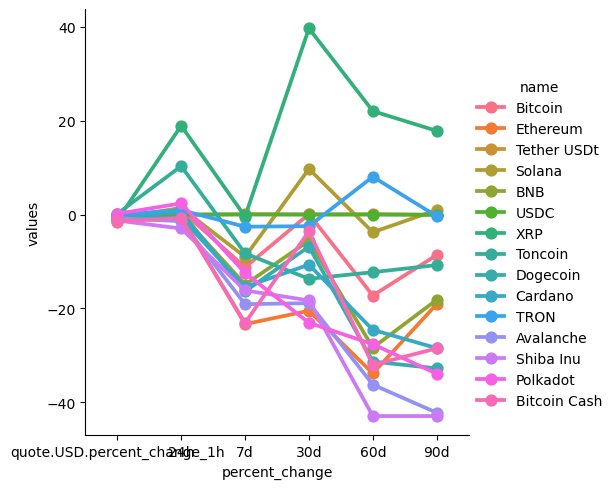

In [58]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [65]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
#df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57469.56527,2024-08-08 10:06:08.648119
1,Ethereum,2441.55098,2024-08-08 10:06:08.648119
2,Tether USDt,1.00050,2024-08-08 10:06:08.648119
3,Solana,154.46451,2024-08-08 10:06:08.648119
4,BNB,487.54870,2024-08-08 10:06:08.648119
5,USDC,1.00007,2024-08-08 10:06:08.648119
6,XRP,0.60478,2024-08-08 10:06:08.648119
7,Toncoin,6.26248,2024-08-08 10:06:08.648119
8,Dogecoin,0.10047,2024-08-08 10:06:08.648119
9,Cardano,0.33151,2024-08-08 10:06:08.648119


In [81]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)